# CREATING THE FINAL DATASET

IMPORTING THE RAW DATASET

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/project_dataset.csv')

In [3]:
dataset.head()

,trans_id,trans_datetime,merchant,category,card_number,card_holder_name,gender,dob,trans_amount,state,zip,fraud_risk
0,0b242abb623afc578575680df30655b9,01-01-2019 00:00,"fraud_Rippin, Kub and Mann",misc_net,2.700000e+15,Jennifer Banks,F,09-03-1988,4.97,NC,28654,0
1,1f76529f8574734946361c461b024d99,01-01-2019 00:00,"fraud_Heller, Gutmann and Zieme",grocery_pos,6.300000e+11,Stephanie Gill,F,21-06-1978,107.23,WA,99160,0
2,a1a22d70485983eac12b5b88dad1cf95,01-01-2019 00:00,fraud_Lind-Buckridge,entertainment,3.890000e+13,Edward Sanchez,M,19-01-1962,220.11,ID,83252,0
3,6b849c168bdad6f867558c3793159a81,01-01-2019 00:01,"fraud_Kutch, Hermiston and Farrell",gas_transport,3.530000e+15,Jeremy White,M,12-01-1967,45.00,MT,59632,0
4,a41d7549acf90789359a9aa5346dcb46,01-01-2019 00:03,fraud_Keeling-Crist,misc_pos,3.760000e+14,Tyler Garcia,M,28-03-1986,41.96,VA,24433,0


ANALYSING THE DATASET

In [4]:
dataset.shape

(1048575, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   trans_id          1048575 non-null  object 
 1   trans_datetime    1048575 non-null  object 
 2   merchant          1048575 non-null  object 
 3   category          1048575 non-null  object 
 4   card_number       1048575 non-null  float64
 5   card_holder_name  1048575 non-null  object 
 6   gender            1048575 non-null  object 
 7   dob               1048575 non-null  object 
 8   trans_amount      1048575 non-null  float64
 9   state             1048575 non-null  object 
 10  zip               1048575 non-null  int64  
 11  fraud_risk        1048575 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 96.0+ MB


In [6]:
fraud = dataset[dataset['fraud_risk'] == 1]
valid = dataset[dataset['fraud_risk'] == 0]

In [7]:
print("Number of fraud data :", len(fraud))
print("Number of valid data :", len(valid))

Number of fraud data : 6006
Number of valid data : 1042569


In [8]:
import seaborn as sns

<AxesSubplot:xlabel='fraud_risk', ylabel='count'>

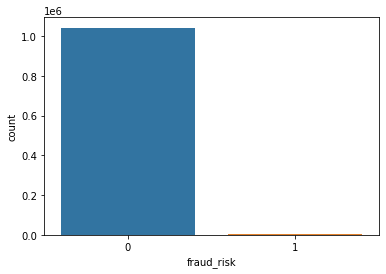

In [9]:
sns.countplot(x = 'fraud_risk', data = dataset)

BALANCING THE DATASET USING "UNDER-SAMPLING"

In [10]:
valid = valid.sample(len(fraud))

In [11]:
dataset = pd.concat([valid, fraud], axis = 0)

In [12]:
dataset = dataset.sort_index()

In [13]:
dataset.reset_index(drop = True, inplace = True)

CALCULATING THE TRANSACTION TIME, DAY, MONTH, AND YEAR

In [14]:
dataset['trans_datetime'] = pd.to_datetime(dataset['trans_datetime'])

In [15]:
dataset.insert(2, 'trans_hour', dataset['trans_datetime'].dt.hour)
dataset.insert(3, 'trans_day', dataset['trans_datetime'].dt.day)
dataset.insert(4, 'trans_month', dataset['trans_datetime'].dt.month)
dataset.insert(5, 'trans_year', dataset['trans_datetime'].dt.year)

CALCULATING THE AGE

In [16]:
dataset['dob'] = pd.to_datetime(dataset['dob'])

In [17]:
import numpy as np

In [18]:
dataset.insert(11, 'age', np.round((dataset['trans_datetime'] - dataset['dob']) // np.timedelta64(1, 'Y')))

DELETING THE REDUNDANT FEATURES

In [19]:
del dataset['trans_id']
del dataset['trans_datetime']
del dataset['merchant']
del dataset['card_holder_name']
del dataset['gender']
del dataset['dob']

In [20]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,card_number,age,trans_amount,state,zip,fraud_risk
0,0,1,1,2019,misc_net,4.640000e+15,31,177.57,UT,84540,0
1,7,1,1,2019,shopping_net,4.490000e+18,89,4.56,SC,29170,0
2,8,1,1,2019,misc_net,2.510000e+15,62,3.49,MI,48088,0
3,8,1,1,2019,grocery_pos,4.590000e+12,65,84.04,MO,64470,0
4,9,1,1,2019,shopping_net,3.510000e+15,59,8.08,WV,25049,0


USING LABELENCODER

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [22]:
dataset['category'] = labelencoder.fit_transform(dataset['category'])
dataset['state'] = labelencoder.fit_transform(dataset['state'])

In [23]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,card_number,age,trans_amount,state,zip,fraud_risk
0,0,1,1,2019,8,4.640000e+15,31,177.57,44,84540,0
1,7,1,1,2019,11,4.490000e+18,89,4.56,40,29170,0
2,8,1,1,2019,8,2.510000e+15,62,3.49,22,48088,0
3,8,1,1,2019,4,4.590000e+12,65,84.04,24,64470,0
4,9,1,1,2019,11,3.510000e+15,59,8.08,49,25049,0


SAVING THE FINAL DATASET

In [24]:
import os.path

In [25]:
if os.path.isfile('../dataset/train_dataset.csv') is False:
    dataset.to_csv('../dataset/train_dataset.csv')

ANALYSING THE UPDATED DATASET

In [26]:
dataset.shape

(12012, 11)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12012 entries, 0 to 12011
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trans_hour    12012 non-null  int64  
 1   trans_day     12012 non-null  int64  
 2   trans_month   12012 non-null  int64  
 3   trans_year    12012 non-null  int64  
 4   category      12012 non-null  int32  
 5   card_number   12012 non-null  float64
 6   age           12012 non-null  int64  
 7   trans_amount  12012 non-null  float64
 8   state         12012 non-null  int32  
 9   zip           12012 non-null  int64  
 10  fraud_risk    12012 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 938.6 KB


In [28]:
fraud = dataset[dataset['fraud_risk'] == 1]
valid = dataset[dataset['fraud_risk'] == 0]

In [29]:
print("Number of fraud data :", len(fraud))
print("Number of valid data :", len(valid))

Number of fraud data : 6006
Number of valid data : 6006


<AxesSubplot:xlabel='fraud_risk', ylabel='count'>

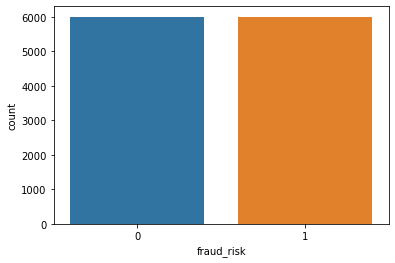

In [30]:
sns.countplot(x = 'fraud_risk', data = dataset)

In [31]:
dataset.nunique()

trans_hour        24
trans_day         31
trans_month       12
trans_year         2
category          14
card_number      318
age               83
trans_amount    9543
state             51
zip              941
fraud_risk         2
dtype: int64